# Классификация

### Описание датасета

Датасет Ирис включает в себя 3 вида цветов Ирис с 50 цветками на каждый вид с индивидуальными параметрами.  Один вид цветов отделен от двух других, но остальные два расположены блзико друг к другу (См. рисунок ниже в блокноте).

Колонки датасета следующие:

Id<br>
SepalLengthCm<br>
SepalWidthCm<br>
PetalLengthCm<br>
PetalWidthCm<br>
Species Sepal Width vs. Sepal Length<br>

Имортируем модуль с Пандас и загрузим наш датасет

In [1]:
import pandas as pd

# Загружаем датасет
data = pd.read_csv('Iris.csv')

Посмотрим на первые и последние 5 записей в датасете

In [2]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


Всего 150 строк. 

Изучим теперь виды Ирисов, которые мы как раз и будем классифицировать

In [4]:
print("Виды")
print(data['Species'].unique())

Виды
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Получили 3 вида.

Посмотрим теперь на остальные данные с помощью методоа descibe в Pandas. Он покажет нам "статистику" по данным из датасета. Количество элементов, минимальный и максимальных элементы и т.д.

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Оригинальные данные

Так как наши оригинальные данные уже распределены по видам, то построим их распределение графически по осям SepalLengthCm (X) и SepalWidthCm (Y). Сделаем это с помощью модулей matplotlib и seaborn.

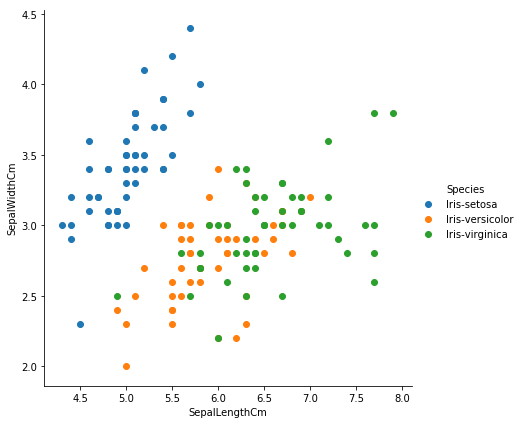

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Генерируем сетку
sns.FacetGrid(data, hue="Species", height=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

# Строим график
plt.show()

### Препроцессинг

Для начала нужно разделить данные на признаки и переменную, которую мы хотим найти.


In [7]:
features = list(data.columns[1:5])            # SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm	
target = data.columns[5]                      # Species

print('Признаки:',features)
print('Целевая перменная:',target)

Признаки: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Целевая перменная: Species


Положим признаки в массив X, а целевую переменную в y, на которой потом будем проверять наши предсказанные классы.

In [8]:
# Храним признаки в "X"
X = data[data.columns[1:5]]                        # slicing: все строки и колонки с 1 по 4

# Храним целевую переменную в "y"
y = data[data.columns[5]]                         # slicing: все строки и 5 колонка

#  Выведем размеры массивов
print(y.shape)
print(X.shape)

(150,)
(150, 4)


Получили матрицы корректного размера

Теперь конвертируем "Виды" ирисов в числа, для обучения модели. Воспользуемся методом LabelEncoder из модуля scikitlearn. Метод кодирует лейблы от 0 до n-1, где n количество классов (в нашем случае видов ирисов).

In [9]:
# Импортируем модуль
from sklearn import preprocessing
# Инициализируем модуль
le = preprocessing.LabelEncoder()
# Передадим туда нашу колонку с классами
le.fit(y)
# присвоим y уже числовые коды классов
y = le.transform(y)

In [10]:
y[:5]

array([0, 0, 0, 0, 0])

Создадим новую колонку в наших данных, где разместить закодированные версии классов.

In [11]:
# создаем новую колонку
data['EncodedSpecies'] = y

print('Классы:',le.classes_)
print('Перекодированные классы:',y)
# Выведем 10 последних элементов нашего обновленного датасета
data.tail(10)

Классы: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Перекодированные классы: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,EncodedSpecies
140,141,6.7,3.1,5.6,2.4,Iris-virginica,2
141,142,6.9,3.1,5.1,2.3,Iris-virginica,2
142,143,5.8,2.7,5.1,1.9,Iris-virginica,2
143,144,6.8,3.2,5.9,2.3,Iris-virginica,2
144,145,6.7,3.3,5.7,2.5,Iris-virginica,2
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


# Модели классификации

### KNN
Модель классификации K-ближайших соседей (K-nearest neighbors (KNN)) работает следующим образом:
1. Выбираем значение K (по скольким соседям мы будем смотреть)
2. Ищем K наблюдений в обучающей выборке, которые "ближе" всего находятся к неизвсотному виду цветка.
3. Опрашиваем эти K соседей и смотрит сколько соседей каждого вида голосуют за свой вид.

Например, K = 5. Нашли 5 ближайщих цветков и узнал их классы. Получили что 3 цветка - Iris-setosa, и 2 цветка Iris-virginica. Так как Iris-setosa больше, то и наш неизвестный цветок скорее всего принадлежит к этому виду.

Модель KNN есть в sklearn, поэтому импортируем нужный модуль и создадим модель с k = 1.

In [12]:
# Подгружаем модуль
from sklearn.neighbors import KNeighborsClassifier
# Инициализируем классификатор с k = 1
knn = KNeighborsClassifier(n_neighbors=1)
# Тренериуем модель
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Давайте проверим работу модели и попросим его предсказать вид цветка для некоторых значений - мы придумываем "синтетические" данные, и смотрим, что предскажет алгоритм.

Вызываем метод predict, который вернет нам номер вида.

In [13]:
value = knn.predict([[3, 5, 4, 2]])
print('Предсказанное значение:',value)

print('Предсказанный класс:' , data.loc[data['EncodedSpecies'] == 2, 'Species'].values[0])

Предсказанное значение: [2]
Предсказанный класс: Iris-virginica


Сделаем еще два предсказания на других значениях

In [14]:
# Создадим небольшой массив
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
print(knn.predict(X_new))

[2 1]


Получили 2 предсказания.

Теперь создадим модель с k = 5.

In [15]:
# Инициализируем модель
knn = KNeighborsClassifier(n_neighbors=5)

# Обучаем модель
knn.fit(X, y)

# Предскажем для прошлого маленького массива
print(knn.predict(X_new))

[1 1]


Получили в первом случае другой класс. К - достаточно сильно влияет на точность ответов. Подбор правильного значения, обычно, и занимает большую часть времени.

Как же проверить какое значение K самое лучшеее?
Сначала сделаем предсказание на весь наш датасет

In [16]:
kypred = knn.predict(X)

Импортируем из sklearn метрику, которая позволит нам численно видеть насколько успешно модель классифицирует виды цветов. Метод accuracy_score возвращает нам число правильно угаданных классов.

In [17]:
from sklearn import metrics
v=[]

А теперь посмтроим график зависимости метрики от K. К будем варьировать от 1 до 50. Получившиеся значения точности будем хранить в массиве v

In [18]:
k_range = list(range(1, 50))
# В цикле строим KNN для каждого значения K
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # Обучаем модель
    knn.fit(X, y)
    # Делаем предсказание
    k_pred = knn.predict(X)
    # Добавляем значение в массив
    v.append( metrics.accuracy_score(y, k_pred))

А теперь построим график и проанализируем его.

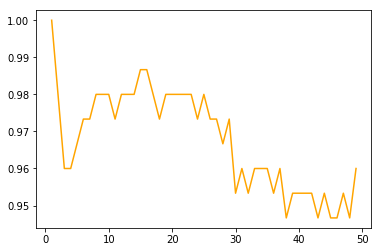

In [19]:
import matplotlib.pyplot as plt
plt.plot(k_range,v,c='Orange',)
plt.show()

Accuracy_score возвращает значение от 0 до 1 и как видно по рисунку, для k = 1 у нас практически 100% результат (потому что алгоритм knn в sklearn берет в качестве первого соседа самого себя, ведь он считает расстояние до каждого элемента датасета и логично что растояние 0 будет у самого себя). Далее идет резкое ухудшение точности до 0.96, потом качество выравнивается и вновь ухудшается. Понятное дело что k = 1, мы брать не будет, так что в нашем случае самое оптимально K ~ 15,16. При этом общее качество модели не опускается ниже 0.95. При большом значении K, относительно размера конкретного датасета (>30 при размере в 150), качество ухудшается.

### Логистическая регрессия

Расмотрим еще одну модель классификации - логистическую регрессию. Она также реализована в sklearn, поэтому первым делом импортируем ее. 

[Чуть больше про логистическую регрессию](https://github.com/aeDeaf/physlearn/wiki/%D0%9F%D0%B5%D1%80%D0%B2%D1%8B%D0%B5-%D1%88%D0%B0%D0%B3%D0%B8.-%D0%A7%D0%B0%D1%81%D1%82%D1%8C-1.-%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F-%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F-%D0%B8-%22%D0%A2%D0%B8%D1%82%D0%B0%D0%BD%D0%B8%D0%BA%22)

In [20]:
from sklearn.linear_model import LogisticRegression

Дальше наши шаги практически идентичны: инициализируем модель, тренируем и предсказываем

In [21]:
# Инициализируем модель (используем параметры по умолчанию)
logreg = LogisticRegression()

# Обучаем модель
logreg.fit(X, y)

# Предскажем для тестовых значений [3, 5, 4, 2]
logreg.predict([[3, 5, 4, 2]]) 

array([2])

KNN нам тоже предсказал второй класс для этих значений.

Теперь предскажем для всех значений нашего датасета

In [22]:
y_pred = logreg.predict(X)

print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Точность моделей

Теперь сравним точность KNN и Логистической регрессии.

In [23]:
# Точность KNN

from sklearn import metrics
print(metrics.accuracy_score(y, kypred))

0.9666666666666667


In [24]:
# Точность Логисчтической регрессии

from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.96


Как мы видим точность этих моделей практически совпадает. Но мы все делали на полном датасете: и обучались и тестировали. А этого лучше не делать.

Посмотрим визуально на получившиеся данные. Создадим 2 новых датафрейма и заменим у них классы на получившиеся предсказания.

In [25]:
knn_pd = data
knn_pd['EncodedSpecies'] = kypred

logres_pd = data
logres_pd['EncodedSpecies'] = y_pred

Выведем график сначала для оригинальных данных, потом для knn и для регрессии

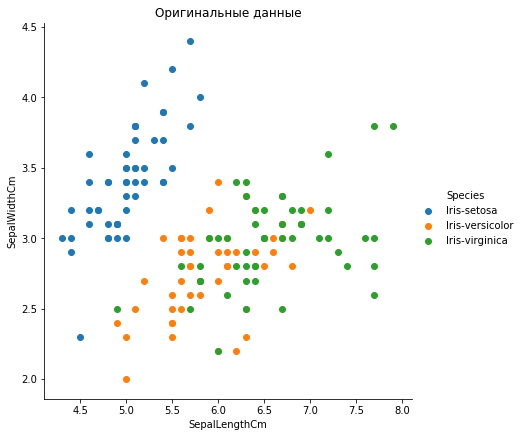

In [26]:
# Генерируем сетку
sns.FacetGrid(data, hue="Species", height=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

# Строим график
plt.title('Оригинальные данные')
plt.show()

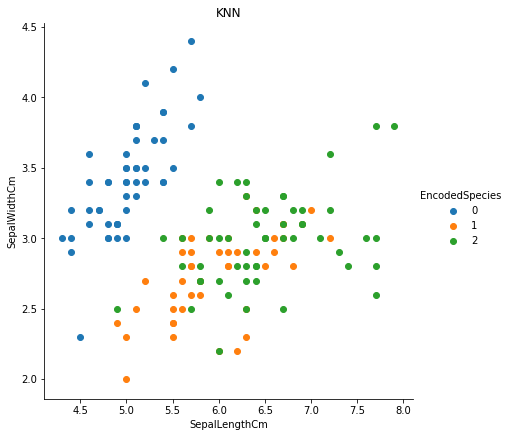

In [27]:
# Генерируем сетку
sns.FacetGrid(knn_pd, hue="EncodedSpecies", height=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

# Строим график
plt.title(u'KNN')
plt.show()

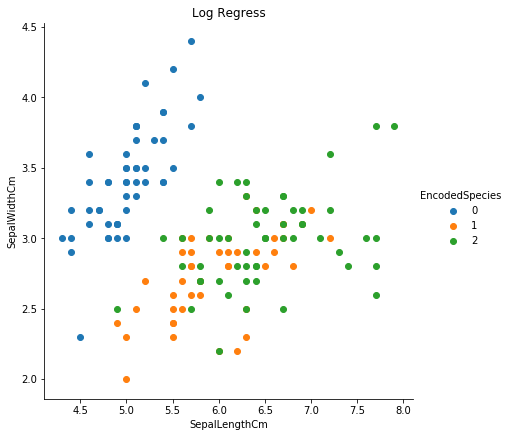

In [28]:
# Генерируем сетку
sns.FacetGrid(logres_pd, hue="EncodedSpecies", height=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

# Строим график
plt.title(u'Log Regress')
plt.show()

Учитывая высокую точность, на глаз сложно определить разницу, но некоторые цветы с зеленым и оранжевым лейблом перепутаны.

### Train test split

Разделим наш датасет на обучающаю и тестовую выборки. Потом обучим knn и логистическую регрессию на этом наборе данных. Предсказывать будем уже только на тестовой выборке. В конце посмотрим как изменилась точность

In [29]:
# Имортируем метод
from sklearn.model_selection import train_test_split

Используем метод train_test_split и поделим данные

In [30]:
# Разделим данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

Посмотрим размеры получившихся выборок

In [31]:
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


У нас 90 значений в обучающей и 60 в тестовой выборке.

### Cross Validation Score

Перекрёстная проверка (кросс-валидация, Cross-validation) — метод оценки аналитической модели и её поведения на независимых данных. При оценке модели имеющиеся в наличии данные разбиваются на k частей. Затем на k−1 частях данных производится обучение модели, а оставшаяся часть данных используется для тестирования. Процедура повторяется k раз; в итоге каждая из k частей данных используется для тестирования. В результате получается оценка эффективности выбранной модели с наиболее равномерным использованием имеющихся данных.

Импортиурем функции кросс-валидации из sklearn.

In [32]:
from sklearn.model_selection import cross_val_score

Инициируем нашу модель на наших данных с количеством фолдов cv = 5. Это как раз то число K, на сколько частей будем делить данные. Передаем также наш классификатор. Сначала knn.

In [33]:
knn = KNeighborsClassifier(n_neighbors=12)
cr_k = cross_val_score(knn, X_train, y_train, cv=5)
print(cr_k)

[0.84210526 0.94736842 0.94444444 0.94117647 1.        ]


Для каждого фолда нам вернулся score - точность модели. Подсчитаем общий скор, взяв среднее от всех значений.

In [34]:
print(cr_k.mean())

0.9350189198486412


Когда модель построена, можно делать предсказание и посмотреть скор предсказания.

In [35]:
knn.fit(X_train, y_train)
# Предсказываем на тестовых
k_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, k_pred)

0.9833333333333333

Построим теперь кросс-валидацию для Логистической регрессии

In [36]:
# Инициализировали
logres = LogisticRegression()
cr_l = cross_val_score(logres, X_train, y_train, cv=5)
print(cr_l)

[0.94736842 0.94736842 1.         0.88235294 0.94117647]


In [37]:
print(cr_l.mean())

0.9436532507739936


Получили 0.94. Чуть сильнее knn.

Сделаем предсказания на тестовой выборке для Логистической регрессии

In [38]:
# Обучили данные
logres.fit(X_train,y_train)

# Предсказали на тестовой выборке
log_pred = logres.predict(X_test)

# Проверим точность
metrics.accuracy_score(log_pred,y_test)

0.95

Модель KNN на разделенных данных показывает себя лучше.

### Grid Search

Каждая из моделей (knn,Log Res) имеет множествео параметров и не всегда очевидно с каким значеним их лучше использовать. Для KNN мы варьировали параметр k. Подобную вещь можно делать для остальных параметров и не только у knn. Для автоматического перебора, выбранных нами значений для параметра, мы будем использовать Grid Search. Он переберет все возможные наборы значений переменных и выявит самую лушую комбинацию.

Сначала подгрузим модуль.

In [39]:
from sklearn.model_selection import GridSearchCV

Создадим словарь параметров и их значений. Будем варьировать параметр penalty, в котором мы указываем норму для нормирования "наказания", параметр fit_intercept, который отвечает за применение константы в функции принятия решения и параметр с - сила регуляризации.

In [40]:
param_grid = dict(random_state = [42], C = [0.01,0.1,1,10], penalty = ['l1', 'l2'],
                 fit_intercept = [False, True])

Инициализируем модель.

In [41]:
gr = GridSearchCV(LogisticRegression(),  param_grid, cv = 5)

Начинаем перебор всех значений

In [42]:
gr.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'random_state': [42], 'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'fit_intercept': [False, True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Теперь посмотрим какой лучший результат у нас получился.

In [43]:
gr.best_score_

0.98

И при каких параметрах

In [44]:
gr.best_params_

{'C': 10, 'fit_intercept': True, 'penalty': 'l1', 'random_state': 42}

Стоит отметить, что при большом количестве параметров или их значений, Grid Search может работать очень долго.

Сделаем Grid Search и для knn.

Создадим словарь параметров.

In [45]:
param_grid = dict(n_neighbors = [2,5,10,15,20], algorithm = ['ball_tree', 'kd_tree', 'brute'])

Запустим поиск оптимальных параметров.

In [46]:
gr = GridSearchCV(KNeighborsClassifier(),param_grid, cv = 5)
gr.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 5, 10, 15, 20], 'algorithm': ['ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Выведем лучший результат и оптимальные параметры

In [47]:
gr.best_score_

0.9866666666666667

In [48]:
gr.best_params_

{'algorithm': 'brute', 'n_neighbors': 10}